In [ ]:
# pip install pandas

In [ ]:
# pip install mysql-connector-python

In [ ]:
# pip install matplotlib

In [ ]:
# pip install seaborn

In [2]:

# pip install bottleneck


Note: you may need to restart the kernel to use updated packages.


In [3]:
# pip install --upgrade os


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


# Ecommerce Queries and Visualizations

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import numpy as np

# Connect to MySQL database
db = mysql.connector.connect(
    host="localhost",
    user="root",
    password="hidden",
    database="ecommerce"
)
# Activate the cursor
cur = db.cursor()

# Basic Queries  


# 1. List all unique cities where customers are located. 

In [2]:
query = """ select distinct customer_city from customers """  # here sql query format mein we will write

cur.execute(query) # now python started again

data = cur.fetchall()   # calling all 

data
# we will get all the unique cities now
# now on sql too, we are going to aply the same querry to see in mysql

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

In [3]:
query = """ select distinct customer_city from customers """  # here sql query format mein we will write

cur.execute(query) # now python started again

data = cur.fetchall()   # calling all 

df = pd.DataFrame(data, columns = ["Customer_City"])
df.head()  # to get top 5 values


,Customer_City
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas


# 2. Count the number of orders placed in 2017.

In [4]:
query = """ select count(order_id) from orders where year(order_purchase_timestamp) = 2017 """  # here sql query format mein we will write
cur.execute(query) # now python started again
data = cur.fetchall()   # calling all 
data[0] # for touple
data[0][0] # for value
('total orders placed in 2017 are', data[0][0])  # with statement printing


('total orders placed in 2017 are', 45101)

# 3. Find the total sales per category.

In [5]:
query = """ select upper(products.product_category) as category, 
round(sum(payments.payment_value),2) as sales
from products join order_items
on products.product_id = order_items.product_id
join payments
on payments.order_id = order_items.order_id
group by category
"""  # here sql query format mein we will write

cur.execute(query) # now python started again

data = cur.fetchall()   # calling all 

data
# we will get the sales of each category and also we want ki point ke baad 2 decimal places tak hi aayein values so we did round in line 2

# creating data frame 
df = pd.DataFrame(data, columns = ["Category", "Sales"])
df
# here also visualization can be done but 74 categories are their which will look very complicated

,Category,Sales
0,PERFUMERY,506738.66
1,FURNITURE DECORATION,1430176.39
2,TELEPHONY,486882.05
3,FASHION BAGS AND ACCESSORIES,218158.28
4,BED TABLE BATH,1712553.67
...,...,...
69,CDS MUSIC DVDS,1199.43
70,LA CUISINE,2913.53
71,FASHION CHILDREN'S CLOTHING,785.67
72,PC GAMER,2174.43


# 4. Calculate the percentage of orders that were paid in installments.

In [6]:
query = """ select sum(case when payment_installments >= 1 then 1
else 0 end) from payments
"""

cur.execute(query)

data = cur.fetchall()
data

[(Decimal('103884'),)]

In [7]:
query = """ select (sum(case when payment_installments >= 1 then 1
else 0 end))/count(*)*100 from payments
"""
# here 1 ko bhi under installments we are counting 
# 0 installments ko basically we are removing 
cur.execute(query)

data = cur.fetchall()
"The percentage of orders that were paid in installments is", data[0]

('The percentage of orders that were paid in installments is',
 (Decimal('99.9981'),))

In [8]:
# considering 1 is also not the part of the installments then we will remove = sign
query = """ select (sum(case when payment_installments > 1 then 1
else 0 end))/count(*)*100 from payments
"""
# here 1 ko bhi under installments we are counting 
# 0 installments ko basically we are removing 
cur.execute(query)

data = cur.fetchall()
'The percentage of orders that were paid in installments is', data[0][0]

('The percentage of orders that were paid in installments is',
 Decimal('49.4176'))

In [9]:
# for clean output, we can use the following code as well

In [10]:
# SQL Query
query = """ 
SELECT 
    (SUM(CASE 
         WHEN payment_installments > 1 THEN 1 
         ELSE 0 
         END) / COUNT(*)) * 100 
AS percentage_of_installments
FROM payments
"""
# count(*) means count all

# Execute Query
cur.execute(query)
data = cur.fetchall()

# Format and Print the Result
percentage = float(data[0][0])
print(f'The percentage of orders that were paid in installments is {percentage}')


The percentage of orders that were paid in installments is 49.4176


# 5. Count the number of customers from each state. 

In [11]:
# SQL Query
query = """ 
select customer_state, count(customer_id)
from customers
group by customer_state
"""
# count(*) means count all

# Execute Query
cur.execute(query)
data = cur.fetchall()

# Format and Print the Result
data


[('SP', 41746),
 ('SC', 3637),
 ('MG', 11635),
 ('PR', 5045),
 ('RJ', 12852),
 ('RS', 5466),
 ('PA', 975),
 ('GO', 2020),
 ('ES', 2033),
 ('BA', 3380),
 ('MA', 747),
 ('MS', 715),
 ('CE', 1336),
 ('DF', 2140),
 ('RN', 485),
 ('PE', 1652),
 ('MT', 907),
 ('AM', 148),
 ('AP', 68),
 ('AL', 413),
 ('RO', 253),
 ('PB', 536),
 ('TO', 280),
 ('PI', 495),
 ('AC', 81),
 ('SE', 350),
 ('RR', 46)]

In [12]:
# SQL Query
query = """ 
select customer_state, count(customer_id)
from customers
group by customer_state
"""
# count(*) means count all

# Execute Query
cur.execute(query)
data = cur.fetchall()

# Format and Print the Result
data

# Creating dataframe 
df = pd.DataFrame(data, columns = ["States", "No. of Customers"])
df

,States,No. of Customers
0,SP,41746
1,SC,3637
2,MG,11635
3,PR,5045
4,RJ,12852
5,RS,5466
6,PA,975
7,GO,2020
8,ES,2033
9,BA,3380


<function matplotlib.pyplot.show(close=None, block=None)>

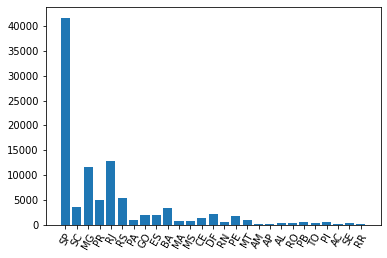

In [13]:
# SQL Query
query = """ 
select customer_state, count(customer_id)
from customers
group by customer_state
"""
# count(*) means count all

# Execute Query
cur.execute(query)
data = cur.fetchall()

# Format and Print the Result
data

# Creating dataframe 
df = pd.DataFrame(data, columns = ["State", "Customer_Count"])
df

plt.bar(df["State"], df["Customer_Count"])
plt.xticks(rotation = 60)  # x axis pw jo bhi likha hai usko ek alag angle pe likhne ke liye
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

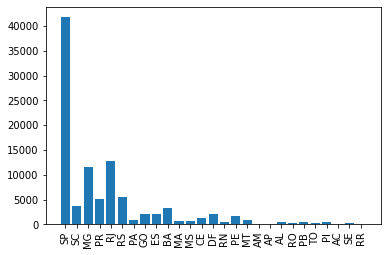

In [14]:
# SQL Query
query = """ 
select customer_state, count(customer_id)
from customers
group by customer_state
"""
# count(*) means count all

# Execute Query
cur.execute(query)
data = cur.fetchall()

# Format and Print the Result
data

# Creating dataframe 
df = pd.DataFrame(data, columns = ["State", "Customer_Count"])
df

plt.bar(df["State"], df["Customer_Count"])
plt.xticks(rotation = 90)  # made it 90 degree
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

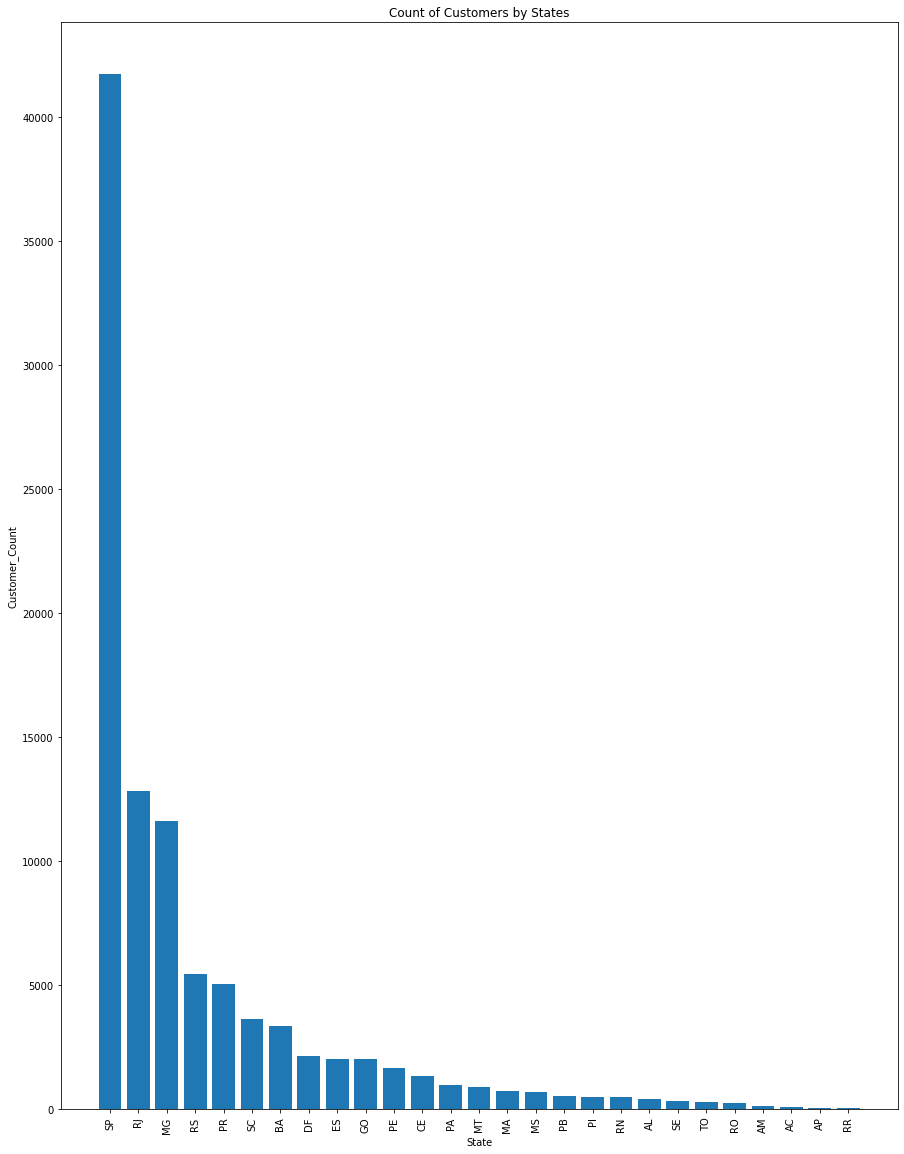

In [15]:
# SQL Query
query = """ 
select customer_state, count(customer_id)
from customers
group by customer_state
"""
# count(*) means count all

# Execute Query
cur.execute(query)
data = cur.fetchall()

# Format and Print the Result
data

# Creating dataframe 
df = pd.DataFrame(data, columns = ["State", "Customer_Count"])
df = df.sort_values(by = "Customer_Count", ascending = False)    # descending order mein state wise bar plot we got now

plt.figure(figsize = (15, 20))  # in terms of width and hight we are deciding the fig size

plt.bar(df["State"], df["Customer_Count"])
plt.xticks(rotation = 90) 

plt.xlabel("State")
plt.ylabel("Customer_Count")
plt.title("Count of Customers by States")
plt.show

# Intermediate Queries 

# 1. Calculate the number of orders per month in 2018.

In [16]:
# SQL Query
query = """ 
select monthname(order_purchase_timestamp) as months, count(order_id) as order_count
from orders where year(order_purchase_timestamp) = 2018
group by months
"""
# count(*) means count all

# Execute Query
cur.execute(query)
data = cur.fetchall()

# Format and Print the Result
data

# Creating dataframe 
df = pd.DataFrame(data, columns = ["Months", "Number_of_Orders"])
df

,Months,Number_of_Orders
0,July,6292
1,August,6512
2,February,6728
3,June,6167
4,March,7211
5,January,7269
6,May,6873
7,April,6939
8,September,16
9,October,4


<function matplotlib.pyplot.show(close=None, block=None)>

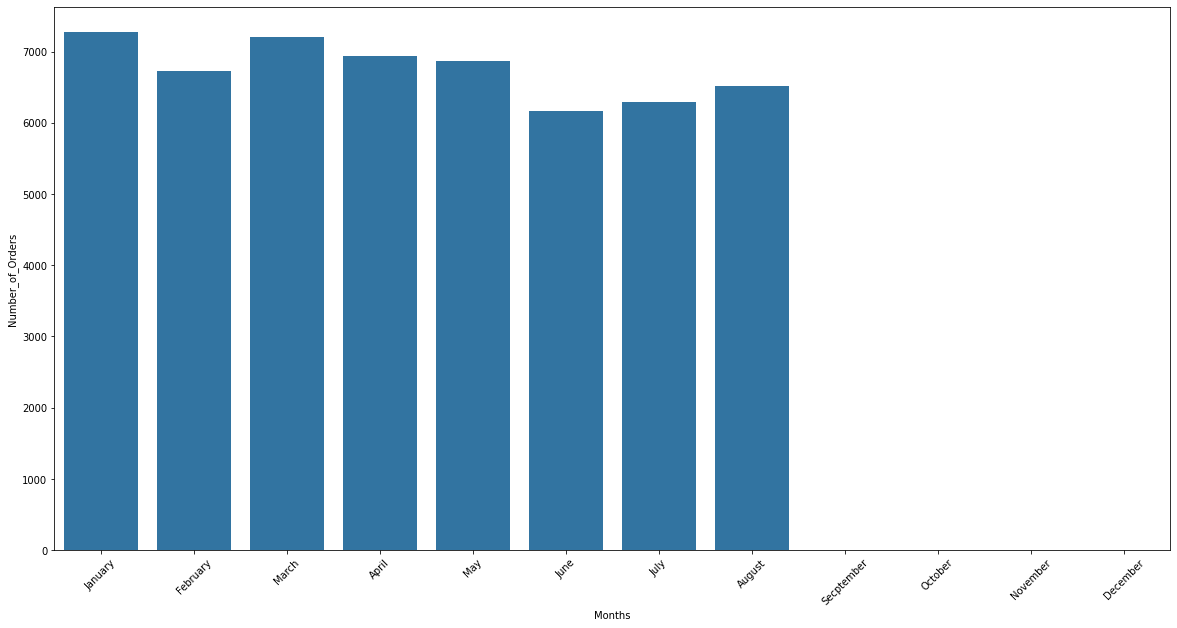

In [17]:
# SQL Query
query = """ 
select monthname(order_purchase_timestamp) as months, count(order_id) as order_count
from orders where year(order_purchase_timestamp) = 2018
group by months
"""
# count(*) means count all

# Execute Query
cur.execute(query)
data = cur.fetchall()

# Format and Print the Result
data

# Creating dataframe 
df = pd.DataFrame(data, columns = ["Months", "Number_of_Orders"])

o = ["January", "February", "March", "April", "May", "June", "July", "August", "Secptember", "October", "November", "December"]
plt.figure(figsize = (20, 10))  # in terms of width and hight we are deciding the fig size
sns.barplot(x = df["Months"], y = df["Number_of_Orders"], data = df, order = o)
plt.xticks(rotation = 45)



plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

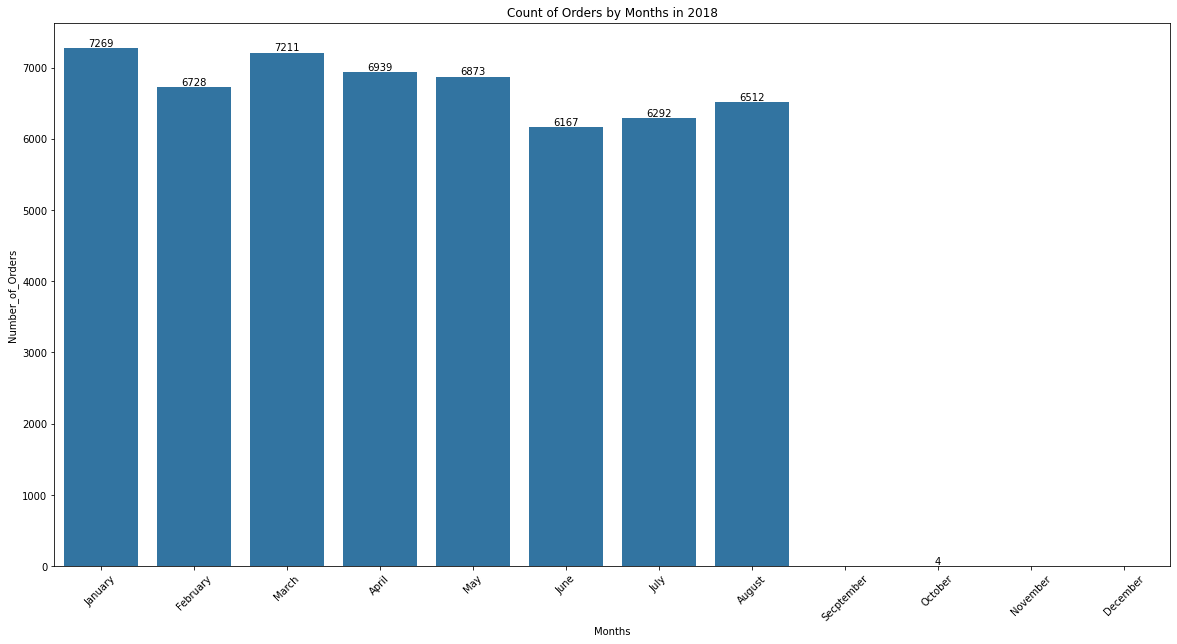

In [18]:
# SQL Query
query = """ 
select monthname(order_purchase_timestamp) as months, count(order_id) as order_count
from orders where year(order_purchase_timestamp) = 2018
group by months
"""
# count(*) means count all

# Execute Query
cur.execute(query)
data = cur.fetchall()

# Format and Print the Result
data

# Creating dataframe 
df = pd.DataFrame(data, columns = ["Months", "Number_of_Orders"])

o = ["January", "February", "March", "April", "May", "June", "July", "August", "Secptember", "October", "November", "December"]
plt.figure(figsize = (20, 10))  # in terms of width and hight we are deciding the fig size

ax = sns.barplot(x = df["Months"], y = df["Number_of_Orders"], data = df, order = o)
plt.xticks(rotation = 45)


# providing bar levels
ax.bar_label(ax.containers[0])

plt.title("Count of Orders by Months in 2018")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

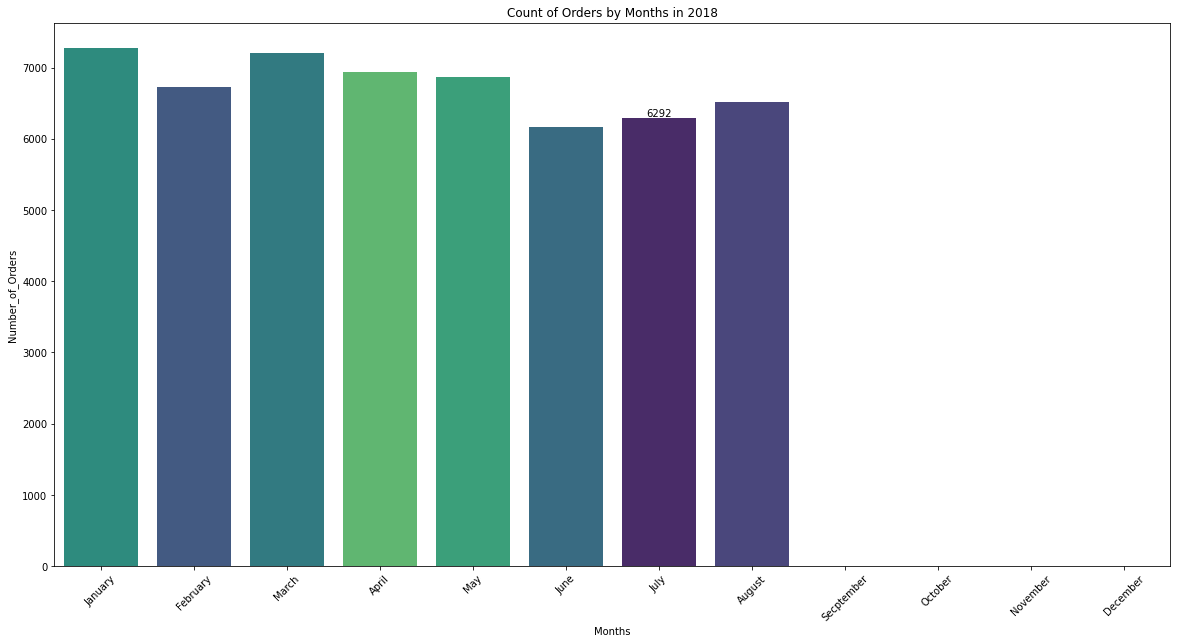

In [19]:
# SQL Query
query = """ 
select monthname(order_purchase_timestamp) as months, count(order_id) as order_count
from orders where year(order_purchase_timestamp) = 2018
group by months
"""
# count(*) means count all

# Execute Query
cur.execute(query)
data = cur.fetchall()

# Format and Print the Result
data

# Creating dataframe 
df = pd.DataFrame(data, columns = ["Months", "Number_of_Orders"])

o = ["January", "February", "March", "April", "May", "June", "July", "August", "Secptember", "October", "November", "December"]
plt.figure(figsize = (20, 10))  # in terms of width and hight we are deciding the fig size

ax = sns.barplot(x = df["Months"], y = df["Number_of_Orders"], data = df, order = o, hue = df["Months"],palette = "viridis")
plt.xticks(rotation = 45)


# providing bar levels
ax.bar_label(ax.containers[0])

plt.title("Count of Orders by Months in 2018")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

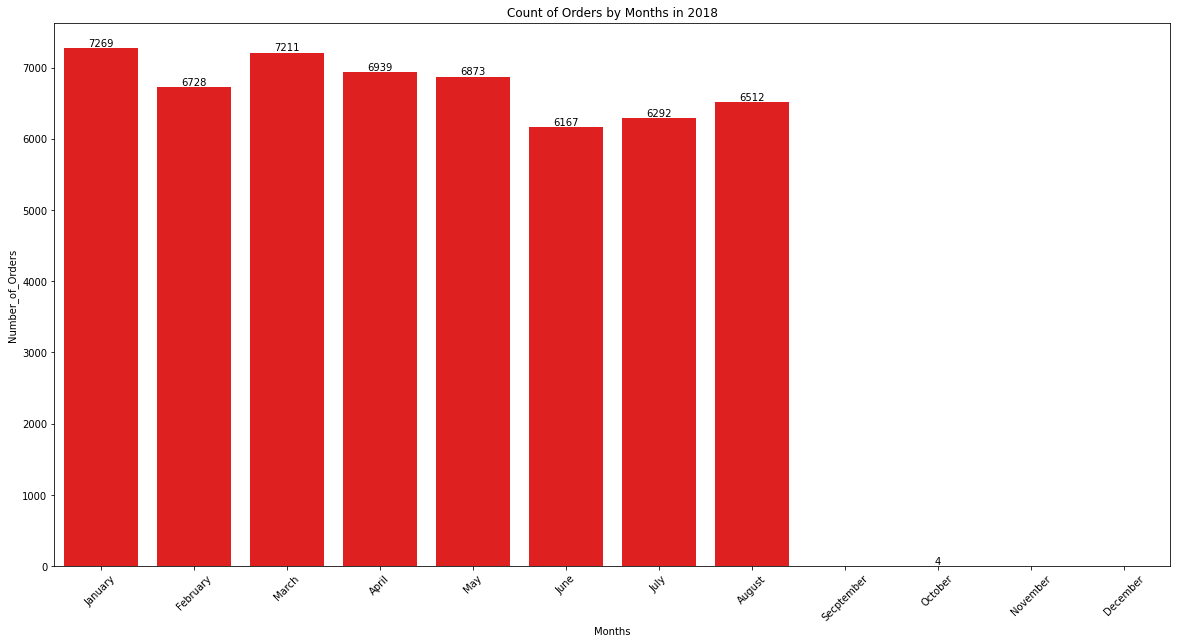

In [20]:
# SQL Query
query = """ 
select monthname(order_purchase_timestamp) as months, count(order_id) as order_count
from orders where year(order_purchase_timestamp) = 2018
group by months
"""
# count(*) means count all

# Execute Query
cur.execute(query)
data = cur.fetchall()

# Format and Print the Result
data

# Creating dataframe 
df = pd.DataFrame(data, columns = ["Months", "Number_of_Orders"])

o = ["January", "February", "March", "April", "May", "June", "July", "August", "Secptember", "October", "November", "December"]
plt.figure(figsize = (20, 10))  # in terms of width and hight we are deciding the fig size

ax = sns.barplot(x = df["Months"], y = df["Number_of_Orders"], data = df, order = o, color = "red")
plt.xticks(rotation = 45)


# providing bar levels
ax.bar_label(ax.containers[0])

plt.title("Count of Orders by Months in 2018")
plt.show

# 2. Find the average number of products per order, grouped by customer city.

In [21]:
# SQL Query
query = """
with count_per_order as
(
    select orders.order_id, orders.customer_id, count(order_items.order_id) as oc
    from orders
    join order_items on orders.order_id = order_items.order_id
    group by orders.order_id, orders.customer_id
)
select  customers.customer_city, round(avg(count_per_order.oc), 2)  average_orders
from customers
join count_per_order on customers.customer_id = count_per_order.customer_id
group by  customers.customer_city order by average_orders desc
"""


# Execute Query
cur.execute(query)
data = cur.fetchall()

# Format and Print the Result
data

# Creating dataframe 
df = pd.DataFrame(data, columns = ["Customer_Cities", "Average_Number_of_Products_Per_Order"])
df.head(10)

,Customer_Cities,Average_Number_of_Products_Per_Order
0,padre carvalho,7.00
1,celso ramos,6.50
2,candido godoi,6.00
3,datas,6.00
4,matias olimpio,5.00
5,morro de sao paulo,4.00
6,cidelandia,4.00
7,picarra,4.00
8,teixeira soares,4.00
9,curralinho,4.00


# 3. Calculate the percentage of total revenue contributed by each product category.

In [22]:
# refering basics question no. 3
# I just have to convert it into percentage by using subqueries

query = """ 
select upper(products.product_category) as category, 
round((sum(payments.payment_value) / (select sum(payment_value) from payments))*100, 2) as Sales_Percentage
from products join order_items
on products.product_id = order_items.product_id
join payments
on payments.order_id = order_items.order_id
group by category order by Sales_Percentage desc


"""  # here sql query format mein we will write

cur.execute(query) # now python started again

data = cur.fetchall()   # calling all 

data
# we will get the sales of each category and also we want ki point ke baad 2 decimal places tak hi aayein values so we did round in line 2

# creating data frame 
df = pd.DataFrame(data, columns = ["Category", "Sales_Percentage"])
df



,Category,Sales_Percentage
0,BED TABLE BATH,10.70
1,HEALTH BEAUTY,10.35
2,COMPUTER ACCESSORIES,9.90
3,FURNITURE DECORATION,8.93
4,WATCHES PRESENT,8.93
...,...,...
69,HOUSE COMFORT 2,0.01
70,CDS MUSIC DVDS,0.01
71,PC GAMER,0.01
72,FASHION CHILDREN'S CLOTHING,0.00


<function matplotlib.pyplot.show(close=None, block=None)>

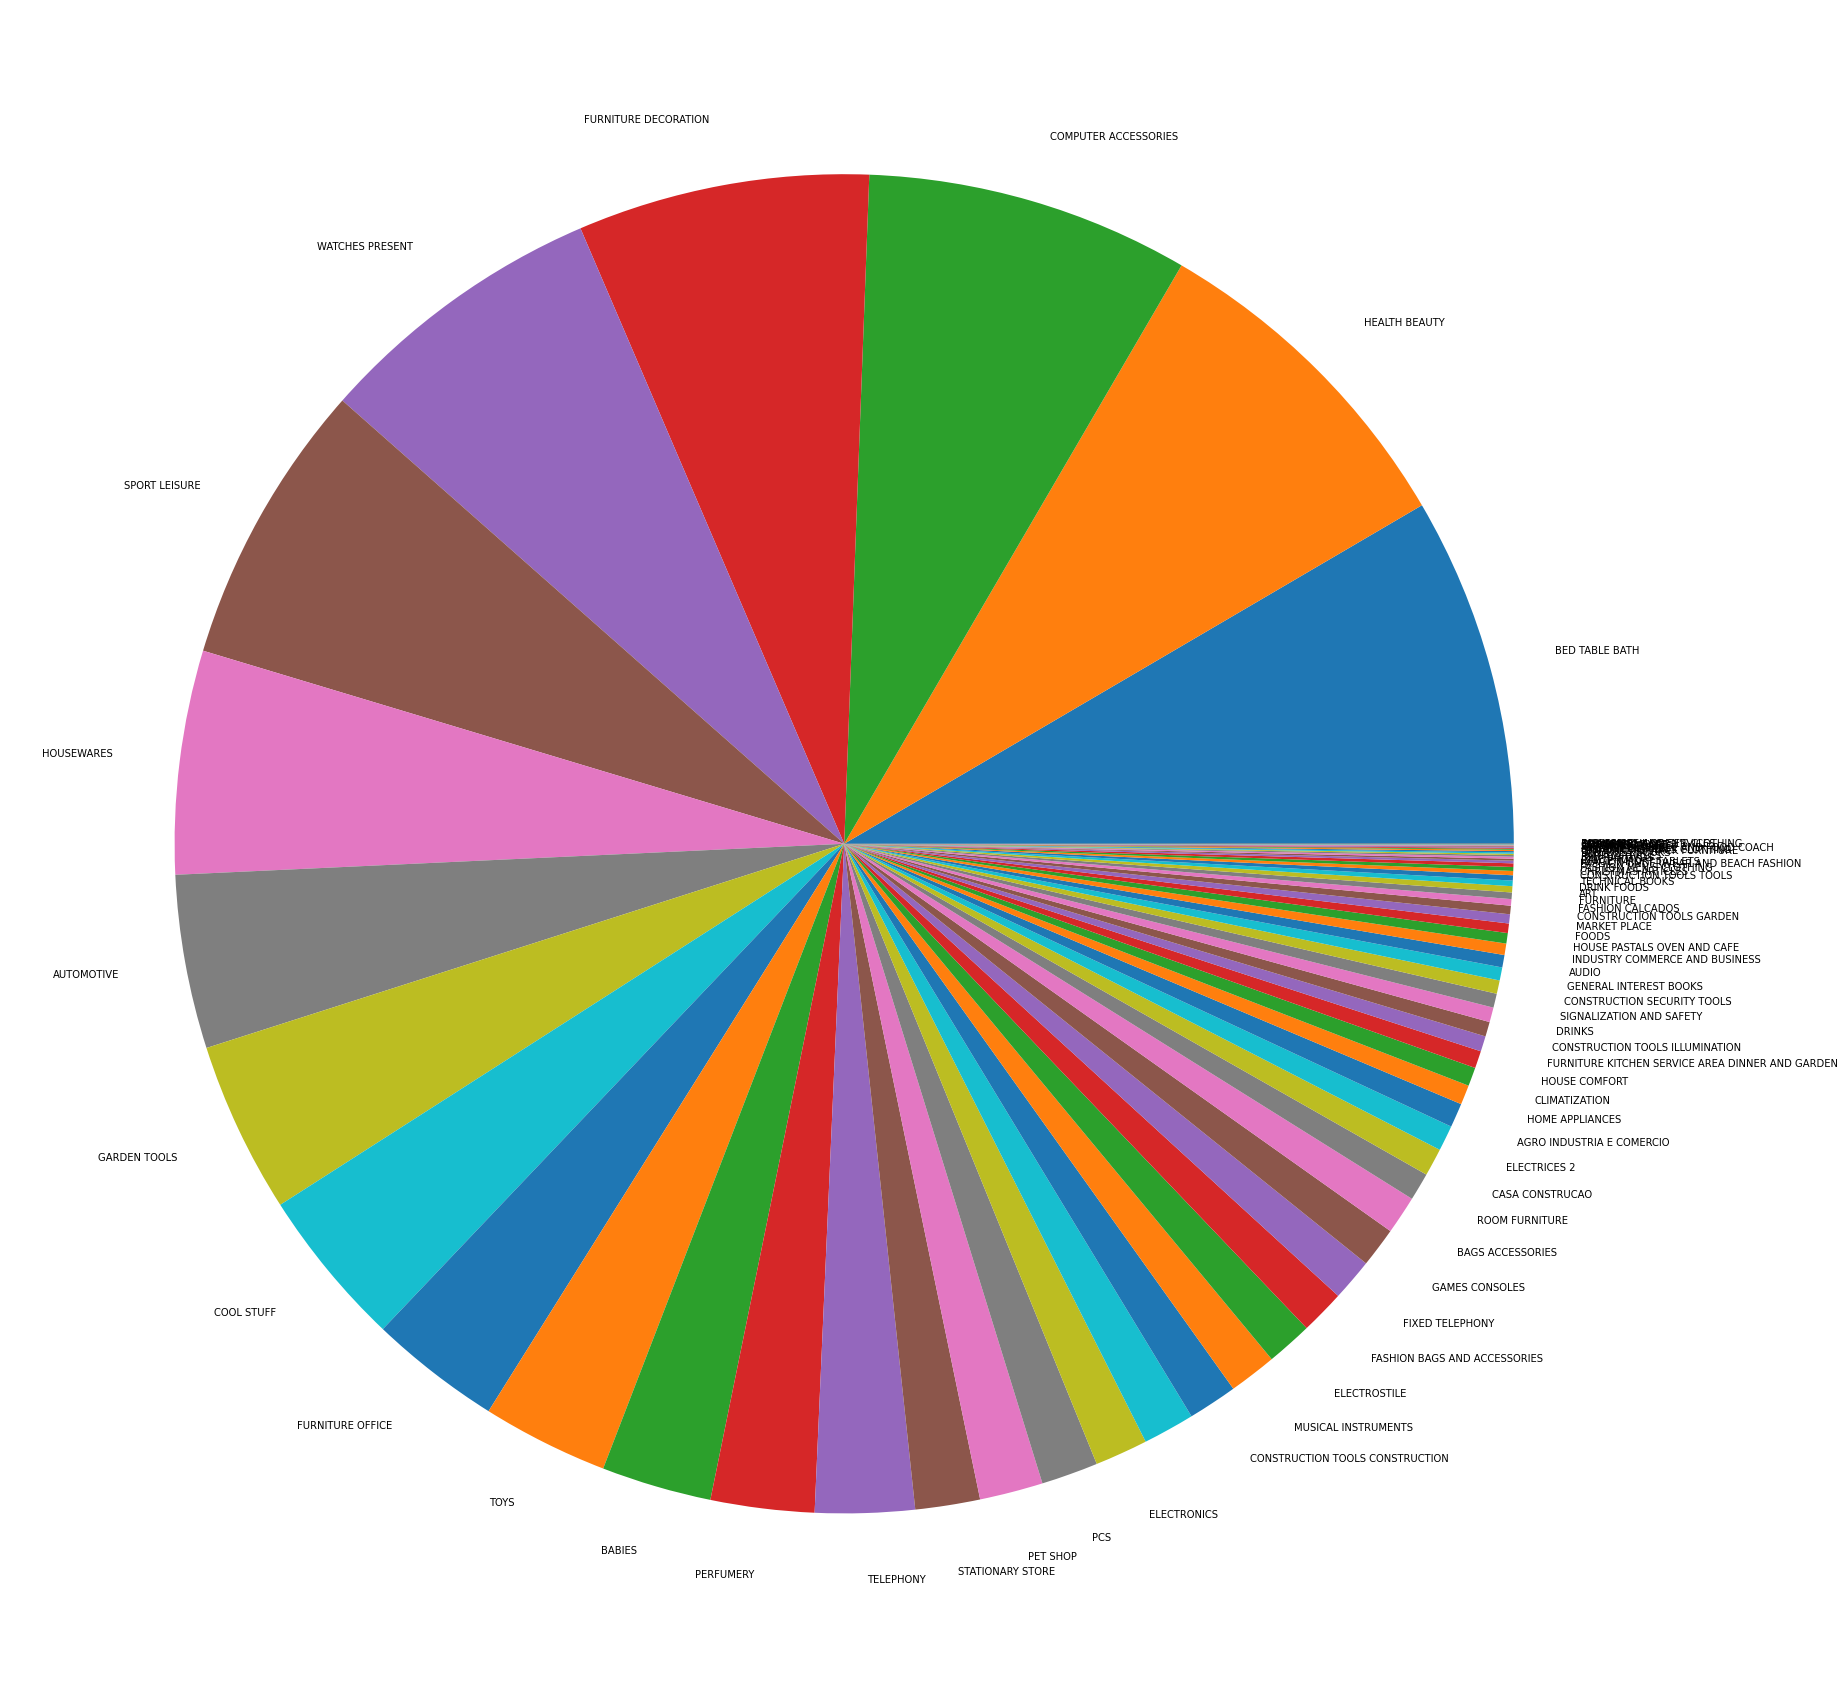

In [23]:
# refering basics question no. 3
# I just have to convert it into percentage by using subqueries

query = """ 
select upper(products.product_category) as category, 
round((sum(payments.payment_value) / (select sum(payment_value) from payments))*100, 2) as Sales_Percentage
from products join order_items
on products.product_id = order_items.product_id
join payments
on payments.order_id = order_items.order_id
group by category order by Sales_Percentage desc


"""  # here sql query format mein we will write

cur.execute(query) # now python started again

data = cur.fetchall()   # calling all 

# creating data frame 
df = pd.DataFrame(data, columns = ["Category", "Sales_Percentage"])

# Creating a pie chart
plt.figure(figsize = (30, 280))
plt.pie(df["Sales_Percentage"], labels = df["Category"])

plt.show

In [24]:
# as we can see here that many values are overlapping with each other , so aise mein avoid making pie charts

# 4. Identify the correlation between product price and the number of times a product has been purchased.

In [25]:
# count of times product has been baught --> pahle isse nikalo then move ahead
# we go for joining operation of product id and order_items
# we will go for average price of each product because no. of products are very limited still their prices are varying by little difference


query = """ 
select products.product_category,
count(order_items.product_id)
from products join order_items
on products.product_id = order_items.product_id
group by products.product_category

"""  # here sql query format mein we will write

cur.execute(query) # now python started again

data = cur.fetchall()
data

[('HEALTH BEAUTY', 9670),
 ('sport leisure', 8641),
 ('Cool Stuff', 3796),
 ('computer accessories', 7827),
 ('Watches present', 5991),
 ('housewares', 6964),
 ('electronics', 2767),
 (None, 1603),
 ('toys', 4117),
 ('bed table bath', 11115),
 ('Games consoles', 1137),
 ('automotive', 4235),
 ('Furniture Decoration', 8334),
 ('home appliances', 771),
 ('telephony', 4545),
 ('Construction Tools Construction', 929),
 ('perfumery', 3419),
 ('stationary store', 2517),
 ('Room Furniture', 503),
 ('Fashion Bags and Accessories', 2031),
 ('Garden tools', 4347),
 ('Fashion Underwear and Beach Fashion', 131),
 ('pet Shop', 1947),
 ('SIGNALIZATION AND SAFETY', 199),
 ('ELECTRICES 2', 238),
 ("Fashion Women's Clothing", 48),
 ('Bags Accessories', 1092),
 ('General Interest Books', 553),
 ('fixed telephony', 264),
 ('HOUSE PASTALS OVEN AND CAFE', 76),
 ('PCs', 203),
 ('technical books', 267),
 ('babies', 3065),
 ('musical instruments', 680),
 ('Furniture office', 1691),
 ('Construction Tools Garde

In [26]:
# now we will go for average pricing
query = """ 
select products.product_category,
count(order_items.product_id),

round(avg(order_items.price), 2)

from products join order_items
on products.product_id = order_items.product_id
group by products.product_category

"""  # here sql query format mein we will write

cur.execute(query) # now python started again

data = cur.fetchall()
data
df = pd.DataFrame(data, columns = ["product_category", "count(order_items.product_id)", "avg(order_items.price)"])
df

,product_category,count(order_items.product_id),avg(order_items.price)
0,HEALTH BEAUTY,9670,130.16
1,sport leisure,8641,114.34
2,Cool Stuff,3796,167.36
3,computer accessories,7827,116.51
4,Watches present,5991,201.14
...,...,...,...
69,flowers,33,33.64
70,Kitchen portable and food coach,15,264.57
71,House Comfort 2,30,25.34
72,CITTE AND UPHACK FURNITURE,38,114.95


In [27]:
# now we will go for coorelation
# we will use numpy 

query = """ 
select products.product_category,
count(order_items.product_id),

round(avg(order_items.price), 2)

from products join order_items
on products.product_id = order_items.product_id
group by products.product_category

"""  # here sql query format mein we will write

cur.execute(query) # now python started again

data = cur.fetchall()
data
df = pd.DataFrame(data, columns = ["Category", "order_count", "price"])

arr1 = df["order_count"]
arr2 = df["price"]

a = np.corrcoef([arr1, arr2])
print("the corelation between price and number of times a product has been purchased is : ", a[0][1])

the corelation between price and number of times a product has been purchased is :  -0.10631514167157562


In [28]:
# ignore diagonal values
# means kuch khaas fark nahi pad raha isliye neutral relationship hai
# -0.10 means very close to 0, which is lagbhag neutral ke aaspaas ki value so no codependency
# correlation value lies in between -1 to 1
# -1 means inversely proportional value while +1 kaa matlab proportional value

# 5. Calculate the total revenue generated by each seller, and rank them by revenue.

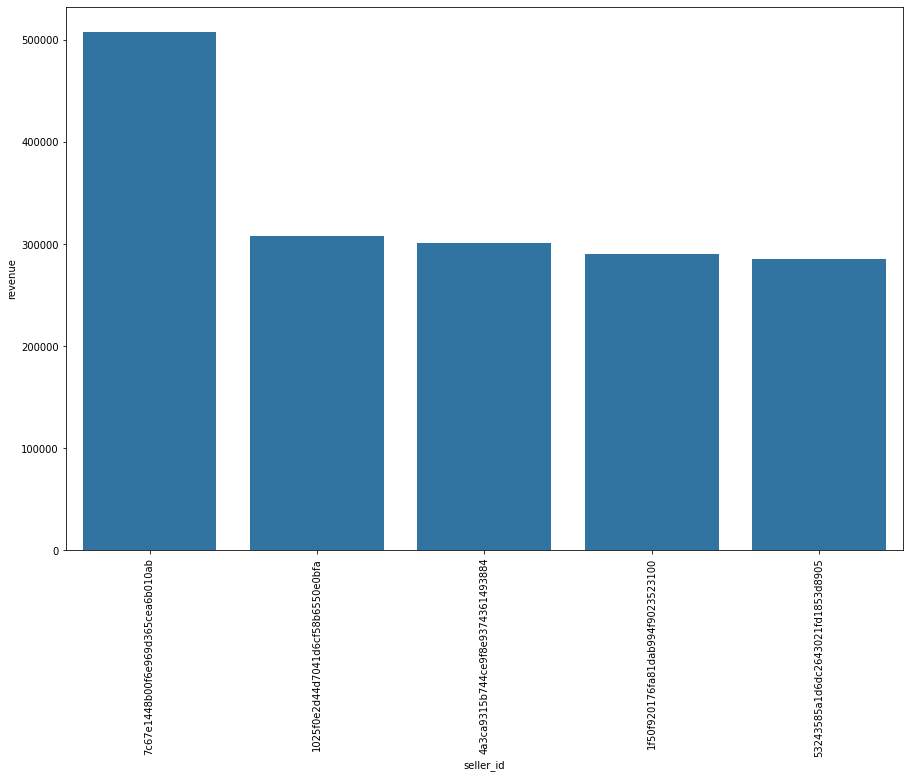

In [29]:
query = """ 
SELECT *, dense_rank() over(ORDER BY revenue DESC) as rn FROM
(SELECT order_items.seller_id, SUM(payments.payment_value)
revenue from order_items join payments
ON order_items.order_id = payments.order_id
GROUP BY order_items.seller_id) AS a
"""  

cur.execute(query)

data = cur.fetchall()
data

 # Creating a DataFrame with appropriate column names
df = pd.DataFrame(data, columns=["seller_id", "revenue", "rank"])
df = df.head()
plt.figure(figsize = (15, 10))
sns.barplot(x = "seller_id", y = "revenue", data = df)
plt.xticks(rotation = 90)
plt.show()

# Advanced Queries

# 1. Calculate the moving average of order values for each customer over their order history.

In [30]:
# Interview point of view se important
query = """ 
select customer_id, order_purchase_timestamp, payment,
avg(payment) over(partition by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row) as mov_avg
from
(select orders.customer_id, orders.order_purchase_timestamp,
payments.payment_value as payment
from payments JOIN orders
on payments.order_id = orders.order_id) as a
"""  

cur.execute(query)

data = cur.fetchall()
data
df = pd.DataFrame(data, columns=["customer_id", "order_purchase_timestamp", "payment", "mov_avg"])
df

,customer_id,order_purchase_timestamp,payment,mov_avg
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.350006
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.010002
...,...,...,...,...
103881,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,71.23,27.120001
103882,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,63.13,63.130001
103883,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,214.13,214.130005
103884,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.500000


# 2. Calculate the cumulative sales per month for each year.

In [31]:
query = """ 
select years, months, payment, sum(payment)
over (order by years, months) as cumulative_sales from 
(select year(orders.order_purchase_timestamp) as years,
month(orders.order_purchase_timestamp) as months,
round(sum(payments.payment_value), 2) as payment from orders join payments
on orders.order_id = payments.order_id
group by years, months order by years, months) as a
"""  

cur.execute(query)

data = cur.fetchall()
data
df = pd.DataFrame(data, columns=["Year", "Month", "Payment", "Cumulative_Sales"])
df


,Year,Month,Payment,Cumulative_Sales
0,2016,9,252.24,252.24
1,2016,10,59090.48,59342.72
2,2016,12,19.62,59362.34
3,2017,1,138488.04,197850.38
4,2017,2,291908.01,489758.39
5,2017,3,449863.60,939621.99
6,2017,4,417788.03,1357410.02
7,2017,5,592918.82,1950328.84
8,2017,6,511276.38,2461605.22
9,2017,7,592382.92,3053988.14


<function matplotlib.pyplot.show(close=None, block=None)>

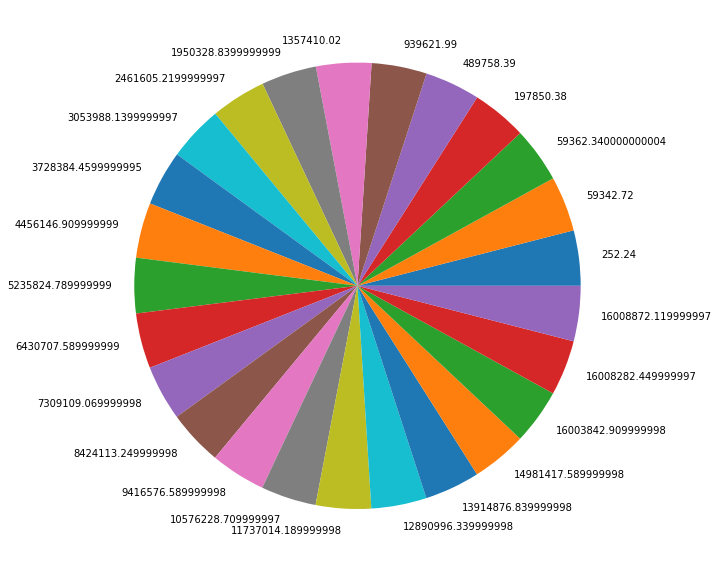

In [32]:
query = """ 
select years, months, payment, sum(payment)
over (order by years, months) as cumulative_sales from 
(select year(orders.order_purchase_timestamp) as years,
month(orders.order_purchase_timestamp) as months,
round(sum(payments.payment_value), 2) as payment from orders join payments
on orders.order_id = payments.order_id
group by years, months order by years, months) as a
"""  
cur.execute(query)
data = cur.fetchall()
data
df = pd.DataFrame(data, columns=["Year", "Month", "Payment", "Cumulative_Sales"])
df
plt.figure(figsize = (10, 30))
plt.pie(df["Year"], labels = df["Cumulative_Sales"])
plt.show

# 3. Calculate the year-over-year growth rate of total sales.

In [33]:
# finding sales of each year
query = """ 
with a as
(select year(orders.order_purchase_timestamp) as years,
round(sum(payments.payment_value), 2) as payment from orders join payments
on orders.order_id = payments.order_id
group by years order by years)

select years, payment, lag(payment, 1) over(order by years), (((payment - lag(payment, 1) over(order by years)) / lag(payment, 1) over(order by years))* 100) as previous_year from a
"""  
cur.execute(query)
data = cur.fetchall()
data
df = pd.DataFrame(data, columns=["Years","Sales", "Previous _year", "yoy_growth_rate_of_total_sales"])
df


,Years,Sales,Previous _year,yoy_growth_rate_of_total_sales
0,2016,59362.34,NaN,NaN
1,2017,7249746.73,59362.34,12112.703761
2,2018,8699763.05,7249746.73,20.000924


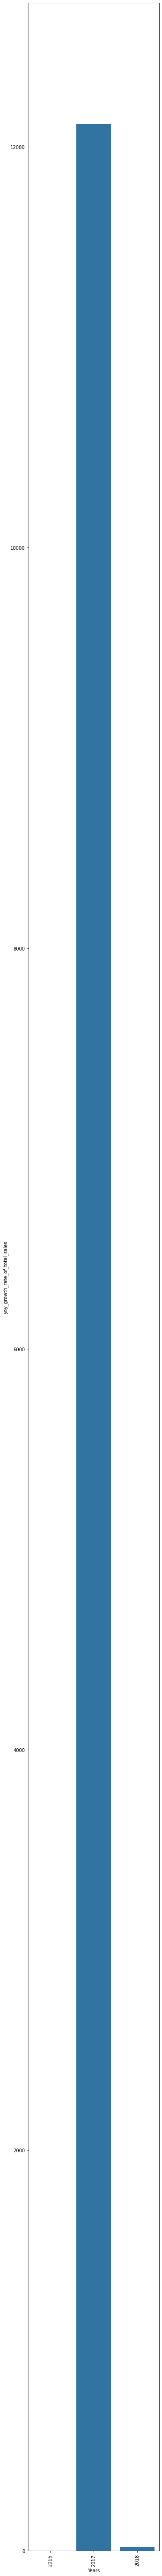

In [34]:
# finding sales of each year
query = """ 
with a as
(select year(orders.order_purchase_timestamp) as years,
round(sum(payments.payment_value), 2) as payment from orders join payments
on orders.order_id = payments.order_id
group by years order by years)

select years, payment, lag(payment, 1) over(order by years), (((payment - lag(payment, 1) over(order by years)) / lag(payment, 1) over(order by years))* 100) as previous_year from a
"""  
cur.execute(query)
data = cur.fetchall()
data
df = pd.DataFrame(data, columns=["Years","Sales", "Previous _year", "yoy_growth_rate_of_total_sales"])

plt.figure(figsize = (5, 100))
sns.barplot(x = "Years", y = "yoy_growth_rate_of_total_sales", data = df)
plt.xticks(rotation = 90)
plt.show()

# 4. Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [35]:
query = """ 
WITH a AS (
    SELECT customers.customer_id,
           MIN(orders.order_purchase_timestamp) AS first_order
    FROM customers 
    JOIN orders ON customers.customer_id = orders.customer_id
    GROUP BY customers.customer_id
),
b AS (
    SELECT a.customer_id, 
           COUNT(DISTINCT orders.order_purchase_timestamp) AS next_order
    FROM a 
    JOIN orders ON orders.customer_id = a.customer_id
    AND orders.order_purchase_timestamp > a.first_order
    AND orders.order_purchase_timestamp < DATE_ADD(a.first_order, INTERVAL 6 MONTH)
    GROUP BY a.customer_id
)
SELECT 100.0 * (COUNT(DISTINCT b.customer_id) / COUNT(DISTINCT a.customer_id)) AS percentage
FROM a 
LEFT JOIN b ON a.customer_id = b.customer_id
WHERE b.next_order > 0
"""  

cur.execute(query)
data = cur.fetchall()
data
# since no customers are repeated thatswhy we are getting the none or null value

[(None,)]

# 5. Identify the top 3 customers who spent the most money in each year.

In [36]:
query = """ 
select count(order_id) from payments
"""  

cur.execute(query)
data = cur.fetchall()
data

[(103886,)]

In [37]:
query = """ 
select count( distinct order_id) from payments
"""  

cur.execute(query)
data = cur.fetchall()
data

[(99440,)]

In [38]:
# as we can see
# the orders are repeating because distinct is not same as total

In [39]:
query = """ 
SELECT orders.order_id, 
       orders.customer_id, 
       SUM(payments.payment_value) AS payment,
       DENSE_RANK() OVER(ORDER BY SUM(payments.payment_value) DESC)
FROM orders 
JOIN payments ON payments.order_id = orders.order_id
GROUP BY orders.order_id, orders.customer_id
"""  

cur.execute(query)
data = cur.fetchall()
data


[('03caa2c082116e1d31e67e9ae3700499',
  '1617b1357756262bfa56ab541c47bc16',
  13664.080078125,
  1),
 ('736e1922ae60d0d6a89247b851902527',
  'ec5b2ba62e574342386871631fafd3fc',
  7274.8798828125,
  2),
 ('0812eb902a67711a1cb742b3cdaa65ae',
  'c6e2731c5b391845f6800c97401a43a9',
  6929.31005859375,
  3),
 ('fefacc66af859508bf1a7934eab1e97f',
  'f48d464a0baaea338cb25f816991ab1f',
  6922.2099609375,
  4),
 ('f5136e38d1a14a4dbd87dff67da82701',
  '3fd6777bbce08a352fddd04e4a7cc8f6',
  6726.66015625,
  5),
 ('2cc9089445046817a7539d90805e6e5a',
  '05455dfa7cd02f13d132aa7a6a9729c6',
  6081.5400390625,
  6),
 ('a96610ab360d42a2e5335a3998b4718a',
  'df55c14d1476a9a3467f131269c2477f',
  4950.33984375,
  7),
 ('b4c4b76c642808cbe472a32b86cddc95',
  'e0a2412720e9ea4f26c1ac985f6a7358',
  4809.43994140625,
  8),
 ('199af31afc78c699f0dbf71fb178d4d4',
  '24bbf5fd2f2e1b359ee7de94defc4a15',
  4764.33984375,
  9),
 ('8dbc85d1447242f3b127dda390d56e19',
  '3d979689f636322c62418b6346b1c6d2',
  4681.77978515625,

In [40]:
query = """ 
SELECT year(orders.order_purchase_timestamp) AS years, 
       orders.customer_id, 
       SUM(payments.payment_value) AS payment,
       DENSE_RANK() OVER(PARTITION BY year(orders.order_purchase_timestamp) 
       ORDER BY SUM(payments.payment_value) DESC 
       ) d_rank
FROM orders 
JOIN payments ON payments.order_id = orders.order_id
GROUP BY YEAR(orders.order_purchase_timestamp), orders.customer_id
"""  

cur.execute(query)
data = cur.fetchall()
data
# jaise hi 2017 chala, rank started from 1 similarly for next years also 
# now we need to extract top 3 ranks

[(2016, 'a9dc96b027d1252bbac0a9b72d837fc6', 1423.550048828125, 1),
 (2016, '1d34ed25963d5aae4cf3d7f3a4cda173', 1400.739990234375, 2),
 (2016, '4a06381959b6670756de02e07b83815f', 1227.780029296875, 3),
 (2016, '1fc56719b52f82c03caddc5faf531fbb', 982.4099731445312, 4),
 (2016, '85f0e92957e9fb9c5f72ba5378f492a0', 979.9099731445312, 5),
 (2016, 'd96619b47e477e6bcc377bb89f2ddaee', 971.9600219726562, 6),
 (2016, 'e937151346d1bec664f5b80cd798bdd2', 818.1199951171875, 7),
 (2016, '303f96887b473d72e34c2d0e492fa43b', 784.7999877929688, 8),
 (2016, '14a2912b7f370c345cebcda474774f55', 783.219970703125, 9),
 (2016, '6b79d5d9914b88e0e05a19e76dfe926b', 676.9199829101562, 10),
 (2016, '88dc22aad9cf20898eb3780977173dc5', 674.3300170898438, 11),
 (2016, 'b03bfe9da81252f5e3b39196ba3518c0', 671.3099975585938, 12),
 (2016, '46fc16f07712c5cdcdd55911a3297e16', 663.9299926757812, 13),
 (2016, '053716fea805d6b29d6f8b6113fefe4d', 661.75, 14),
 (2016, '442d66f0d96f656096dd70f1b0391e40', 659.4099731445312, 15),
 

<function matplotlib.pyplot.show(close=None, block=None)>

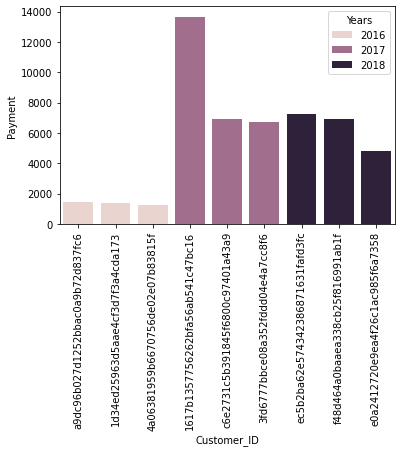

In [41]:
query = """ 
select years, customer_id, payment, d_rank
from 

(SELECT year(orders.order_purchase_timestamp) AS years, 
       orders.customer_id, 
       SUM(payments.payment_value) AS payment,
       DENSE_RANK() OVER(PARTITION BY year(orders.order_purchase_timestamp) 
       ORDER BY SUM(payments.payment_value) DESC 
       ) d_rank
FROM orders 
JOIN payments ON payments.order_id = orders.order_id
GROUP BY YEAR(orders.order_purchase_timestamp), orders.customer_id) as a
where d_rank<=3
"""  

cur.execute(query)
data = cur.fetchall()
data
df = pd.DataFrame(data, columns=["Years", "Customer_ID", "Payment", "Rank"])

sns.barplot(x = "Customer_ID", y = "Payment", data = df, hue = "Years")
plt.xticks(rotation = 90)
plt.show